# Medidas de tendencia central

Las **MTC** son el resumen de un conjunto de datos en un solo valor, también los podemos describir como el valor más significativo del conjunto.

**Media**
$$
  \text{\={X}}={\frac 1 n} {\sum_{i=1}^n}{x_i} = {\frac {x_{1} + x_{2} + ... +x_{n}} n }
$$

**Mediana (Impar)**
$$
M_e = x_{\frac {N+1}2}
$$

**Mediana (Par)**
$$
M_e ={\frac1 2} [x_{\frac N2} + (x_{{\frac N 2}+1})]
$$

 > 📢 Antes de aplicar la formula de la mediana los datos deben estar **ORDENADOS**.

**Moda**
$$ x_k $$
Donde:
$$ Freq(x_k) = max(Freq(x_i))

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
cars_df = pd.read_csv("../data/cars.csv")
cars_df.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83


Con `pandas` utilizando el comando `describe()` obtenemos un resumen general de las columnas númericas de un data frame (conjunto de datos), el resumen muestra tanto las medidas de tencia central como las de dispersión.

In [9]:
cars_df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


También podemos obtener las MTC con su respectivo comando a una columna númerica especifica. <br>
Para el ejemplo y el resto del notebook se utilizara la columna `price_usd` (variable numérica continua).

In [10]:
price_mean = cars_df["price_usd"].mean()
price_median = cars_df["price_usd"].median()
print(f"Media: ${price_mean}")
print(f"Mediana: ${price_median}")

Media: $6639.971021255613
Mediana: $4800.0


Dado el resumen, podemos ver que la media de precios de carros usados es de $6,639.97... dolares, sin embargo la mediana es de $4,800 dolares. <br>
Como primer observación, podemos inferir que _hay ciertos valores atipicos que hacen que la media se desplace hacia la derecha de la mediana._ 

Para corroborar si la observación es acertada o no, podemos represetar la información de forma gráfica con un histograma.

<Axes: ylabel='Frequency'>

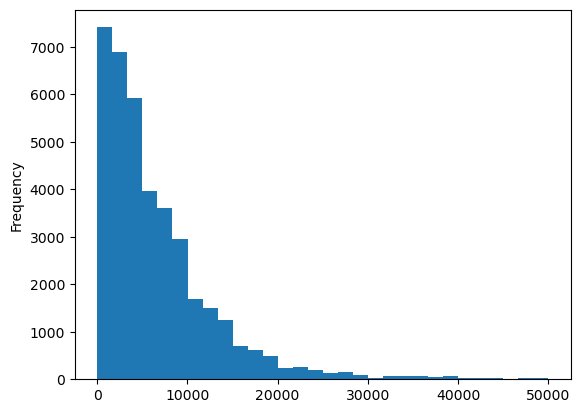

In [13]:
cars_df["price_usd"].plot.hist(bins=30)

Los precios con más frecuencia estan dentro del rango de $0 a $10,000, si observamos más a la derecha encontramos que hay pocos carros con precios muy elevados a pesar de ser usados. Lo cual nos puede llevar a que la observación inicial es correcta.

Para hacer más interesante el análisis, podemos agregar una variable cátegorica, de esta forma podemos segmentar los precios de los datos por una categoría.

Categoria = `manufacturer_name` (Marca del auto)

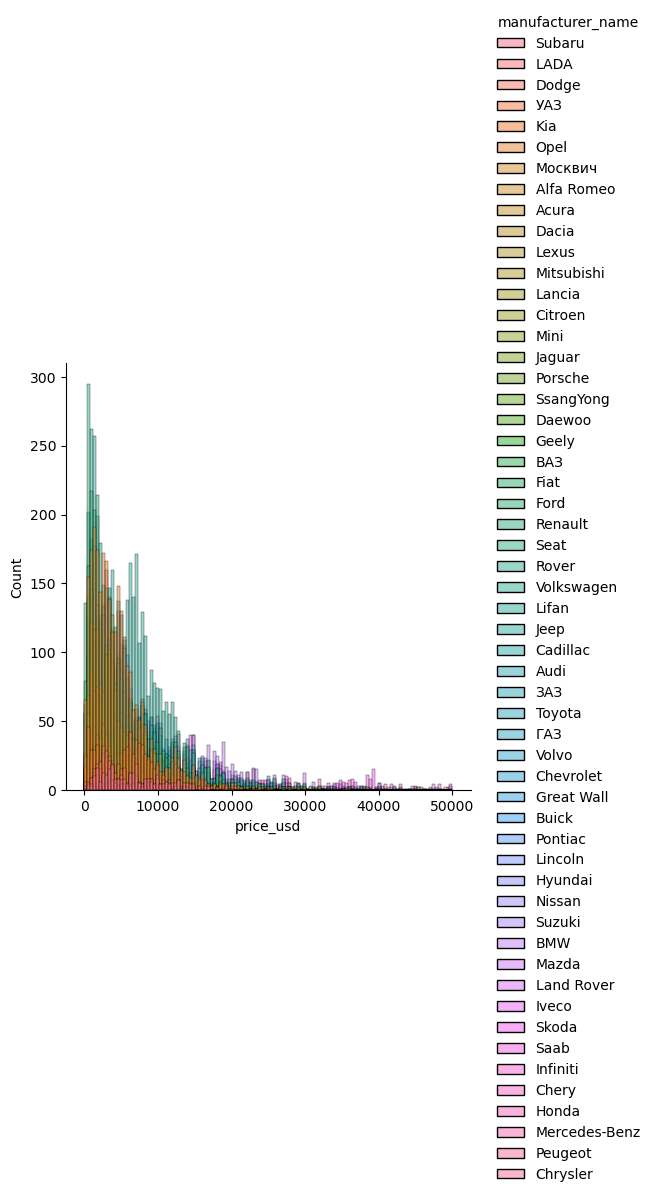

In [16]:
sns.displot(data=cars_df, x="price_usd", hue="manufacturer_name")

:warning: El gráfico anterior rompe con el objetivo de la visualización de datos, ya que este busca resumir la información de forma clara y sencilla.

Para evitar el problema del gráfico anterior se cambiará de categoría.

Categoria = `engine_type` (Tipo de motor)

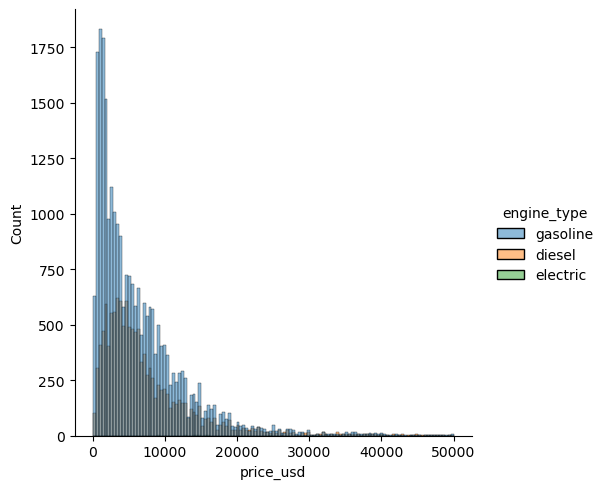

In [17]:
sns.displot(data=cars_df, x="price_usd", hue="engine_type")

La visualización es mejor al no contar con tatas categorías empalmadas, sin embargo el grafico se puede mejorar cambiando las barras que estan unas de detras de otras, por unas barras empalmadas (staked).

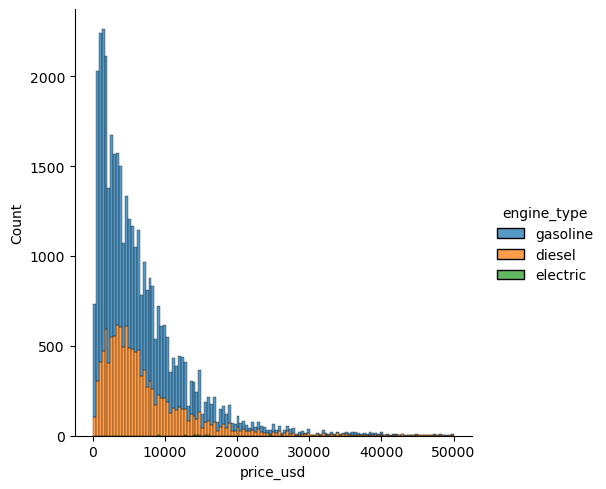

In [18]:
sns.displot(data=cars_df, x="price_usd", hue="engine_type", multiple="stack")

Existen 3 categorías distintas
1. Gasoline
2. Diesel
3. Electric

Sin embargo en el gráfico no seven las barras correspondientes a los autos eléctricos, esto puede ser porque la cantidad de este tipo de carros es muy baja.

Para corroborarlo podemos utilizar el comando `count()` de `pandas`.

In [20]:
cars_df.groupby("engine_type").count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


📌 Conteo de datos también es considerado como un estadístico descriptivo.

> 🗣️ _Las medidas de tendencia central (MTC) representan los valores mas significativos de un conjunto de datos, conocerlas, entenderlas y saber calcularlas nos abren el panorama en la interpretación inicial de los datos (general), son la puerta de entrada y la guía hacia un analísis más profundo._

## Reto
Del data set de carros usuados, crear un analísis de una marca y modelo de auto especifico.

Marca = BMW <br>
Modelo = X5

In [45]:
bmw_x5 = cars_df[(cars_df["manufacturer_name"] == "BMW") & (cars_df["model_name"] == "X5")]
bmw_x5.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
27500,BMW,X5,automatic,grey,171000,2016,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,124
27508,BMW,X5,automatic,silver,325000,2004,gasoline,False,gasoline,3.0,...,True,True,False,True,True,True,True,True,True,17


Resumen estadistico del las BMW X5

In [31]:
bmw_x5.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.00000
mean,252891.107744,2006.471380,3.320875,15244.745488,12.481481,22.872054,89.79798
std,101518.496988,3.892129,0.627012,8758.979627,7.896319,47.824183,92.76667
min,11.000000,2000.000000,2.500000,2400.000000,1.000000,1.000000,0.00000
25%,186000.000000,2003.000000,3.000000,9000.000000,7.000000,2.000000,31.00000
50%,245000.000000,2007.000000,3.000000,12950.000000,10.000000,9.000000,64.00000
75%,306000.000000,2009.000000,3.000000,18000.000000,16.000000,23.000000,112.00000
max,1000000.000000,2017.000000,5.000000,49900.000000,71.000000,456.000000,527.00000


### Relación Precio - Año de producción

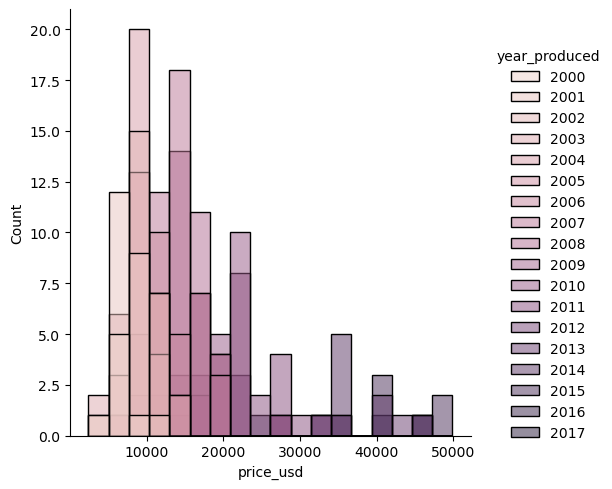

In [37]:
sns.displot(data=bmw_x5, x="price_usd", hue="year_produced")

**Observación**: Las camionetas con mayor antiguedad tienen los precios más bajos en comparación con aquellos que se produjeron en años más recientes.

### Relación Precio - Tipo de motor

In [44]:
bmw_x5.groupby("engine_type").count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,142,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
gasoline,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155


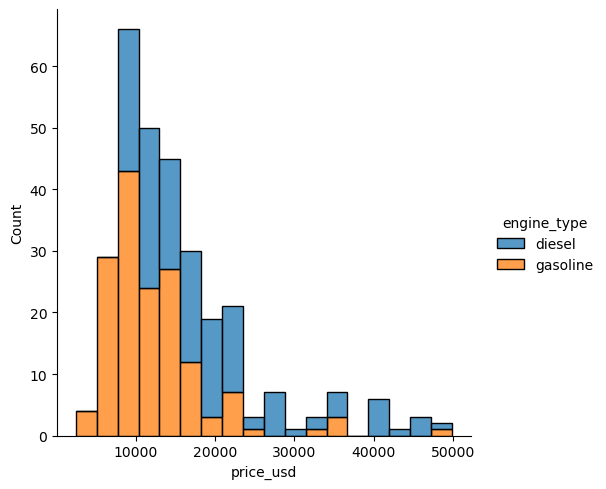

In [43]:
sns.displot(data=bmw_x5, x="price_usd", hue="engine_type", multiple="stack")

**Observación**: La producción de modelos X5 con motores a base de gasolina es similar a la de motores a base de diesel, sin embargo son los segundos los que tienen mayor valor.

### Relación Precio - Transmision

In [48]:
bmw_x5.groupby("transmission").count()

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
transmission,,,,,,,,,,,,,,,,,,,,,
automatic,294,294,294,294,294,294,294,294,294,294,...,294,294,294,294,294,294,294,294,294,294
mechanical,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


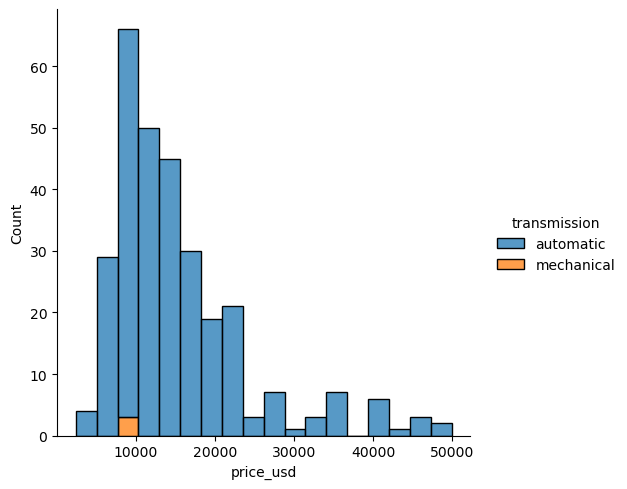

In [49]:
sns.displot(data=bmw_x5, x="price_usd", hue="transmission", multiple="stack")

**Observación**: La marca BMW no produce modelos X5 con transmisión manual y aquellos que fueron producidos llegan a costar hasta $10,000 dolares.

### Relación Año - Tipo de motor

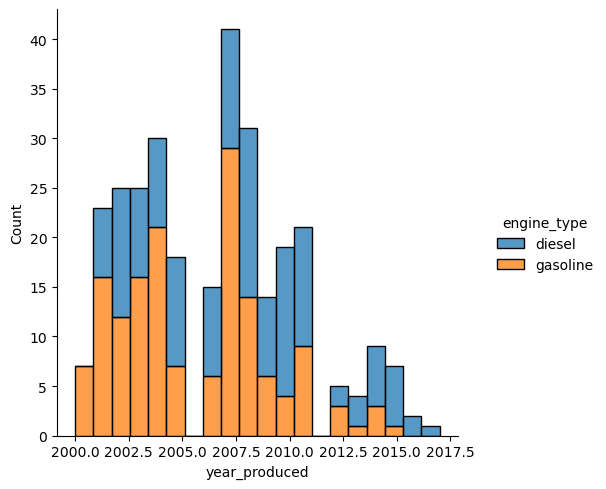

In [53]:
sns.displot(data=bmw_x5, x="year_produced", hue="engine_type", multiple="stack", bins=20)

**Observación**: BMW produjo más camionetas X5 con motor a base de diesel del año 2012 al 2017.